In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [13]:
def plot_bloch_sphere(states, title="Bloch Sphere"):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)

    # Plot the Bloch sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b', alpha=0.1)

    # Convert state to Bloch vector
    def state_to_bloch(state):
        rho = np.outer(state, np.conj(state))
        x = np.real(np.trace(rho @ qml.PauliX(0).matrix))
        y = np.real(np.trace(rho @ qml.PauliY(0).matrix))
        z = np.real(np.trace(rho @ qml.PauliZ(0).matrix))
        return [x, y, z]

    for state in states:
        bloch_vector = state_to_bloch(state)
        ax.quiver(0, 0, 0, bloch_vector[0], bloch_vector[1], bloch_vector[2], color='r')
    plt.show()

def random_state_vector(num_qubits):
    state = np.random.randn(2 ** num_qubits) + 1j * np.random.randn(2 ** num_qubits)
    state /= np.linalg.norm(state)
    return state

def generate_initial_states(num_states, num_qubits):
    return [random_state_vector(num_qubits) for _ in range(num_states)]

def generate_random_unitaries(num_qubits, num_steps):
    return [qml.math.linalg.expm(1j * np.random.randn(2 ** num_qubits, 2 ** num_qubits)) for _ in range(num_steps)]

def apply_unitary(state, unitary):
    return unitary @ state

def forward_scrambling(states, unitaries):
    scrambled_states = []
    for state in states:
        for U in unitaries:
            state = U @ state
        scrambled_states.append(state)
    return scrambled_states


In [20]:
# Define the number of qubits and the device
num_qubits = 1  # Single qubit for Bloch sphere visualization
dev = qml.device("default.qubit", wires=num_qubits)

num_states = 10
S0 = generate_initial_states(num_states, num_qubits)

print(S0)

num_steps = 5
random_unitaries = generate_random_unitaries(num_qubits, num_steps)

S_T = forward_scrambling(S0, random_unitaries)

# plot_bloch_sphere(S0, title="Initial States")
# plot_bloch_sphere(S_T, title="Scrambled States")


[tensor([0.903081  +0.19082361j, 0.31688307-0.2182113j ], requires_grad=True), tensor([-0.51338692+0.2932673j , -0.46559987-0.65851721j], requires_grad=True), tensor([ 0.44198998+0.01693056j, -0.48172795+0.75650274j], requires_grad=True), tensor([0.65818775+0.46156961j, 0.55862597-0.20415535j], requires_grad=True), tensor([-0.52025521+0.55668969j, -0.54723554+0.34635873j], requires_grad=True), tensor([0.45696854-0.48760103j, 0.07082762+0.74054604j], requires_grad=True), tensor([0.78820334+0.26720829j, 0.28641681+0.47465843j], requires_grad=True), tensor([ 0.58051927+0.44280349j, -0.49280355-0.47335727j], requires_grad=True), tensor([-0.16553314+0.15661482j, -0.77979793-0.58308298j], requires_grad=True), tensor([0.30497842-0.88530257j, 0.27679444-0.21589895j], requires_grad=True)]


In [23]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# set the random seed
np.random.seed(42)

# Use the mixed state simulator to save some steps in plotting later
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def not_a_haar_random_unitary():
    # Sample all parameters from their flat uniform distribution
    phi, theta, omega = 2 * np.pi * np.random.uniform(size=3)
    qml.Rot(phi, theta, omega, wires=0)
    return qml.state()

num_samples = 2021

not_haar_samples = [not_a_haar_random_unitary() for _ in range(num_samples)]

print(not_haar_samples)

[array([[0.97621692+0.j       , 0.017202  -0.1513986j],
       [0.017202  +0.1513986j, 0.02378308+0.j       ]]), array([[0.77838917+0.j        , 0.23129934-0.34496389j],
       [0.23129934+0.34496389j, 0.22161083+0.j        ]]), array([[0.83341852+0.j        , 0.29989945-0.22111629j],
       [0.29989945+0.22111629j, 0.16658148+0.j        ]]), array([[0.99582386+0.j        , 0.06333884+0.01211972j],
       [0.06333884-0.01211972j, 0.00417614+0.j        ]]), array([[0.61721411+0.j        , 0.20190056-0.44215045j],
       [0.20190056+0.44215045j, 0.38278589+0.j        ]]), array([[ 0.33287278+0.j        , -0.46555195+0.07300601j],
       [-0.46555195-0.07300601j,  0.66712722+0.j        ]]), array([[ 0.37191866+0.j        , -0.36879021+0.31239231j],
       [-0.36879021-0.31239231j,  0.62808134+0.j        ]]), array([[ 0.36914061+0.j        , -0.32221631-0.35923874j],
       [-0.32221631+0.35923874j,  0.63085939+0.j        ]]), array([[ 0.60961104+0.j        , -0.15170073+0.46365106j],
    

In [24]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Used the mixed state simulator so we could have the density matrix for this part!
def convert_to_bloch_vector(rho):
    """Convert a density matrix to a Bloch vector."""
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

not_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in not_haar_samples])

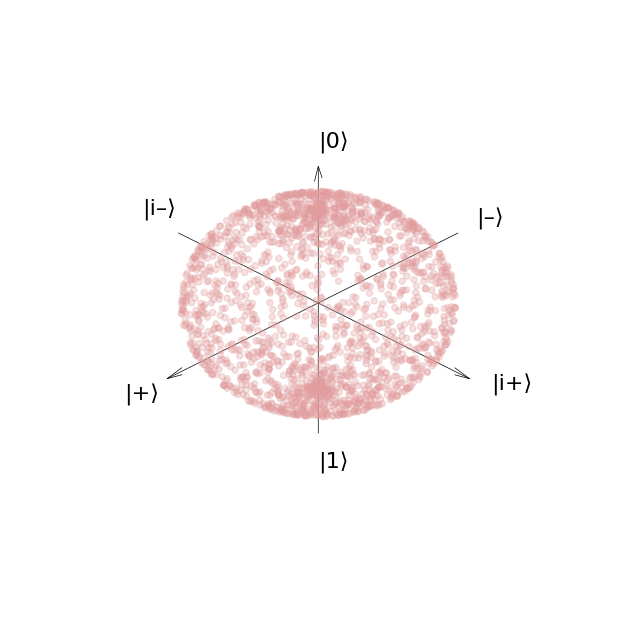

In [25]:
def plot_bloch_sphere(bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

plot_bloch_sphere(not_haar_bloch_vectors)

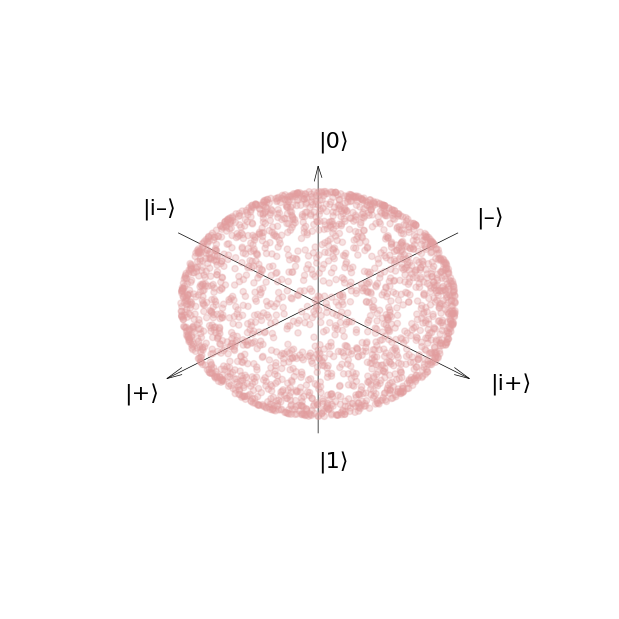

In [26]:
from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # The 0.5 is so that the distribution is normalized
        return 0.5 * np.sin(theta)

# Samples of theta should be drawn from between 0 and pi
sin_sampler = sin_prob_dist(a=0, b=np.pi)

@qml.qnode(dev)
def haar_random_unitary():
    phi, omega = 2 * np.pi * np.random.uniform(size=2) # Sample phi and omega as normal
    theta = sin_sampler.rvs(size=1) # Sample theta from our new distribution
    qml.Rot(phi, theta, omega, wires=0)
    return qml.state()

haar_samples = [haar_random_unitary() for _ in range(num_samples)]
haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in haar_samples])

plot_bloch_sphere(haar_bloch_vectors)